# CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2018 ###

# Optimization of Various Fantasy Teams#

#### Michael Yang (yang363@wisc.edu), Brendon Lapp (blapp@wisc.edu), Luke Steidl (lsteidl@wisc.edu), and Sam Thorson (sthorson@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-Model)
    1. [Best Team Optimal Mathematical Model](#2A.-Best-Team-Optimal-Mathematical-Model)
    1. [Model for the Top Teams](#2B.-Model-for-the-Top-Teams)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-Discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Fantasy sport is a hobby cherished by many sport fans all over the World. Ranging from football and soccer, to basketball and baseball, fantasy sports is a great way for people to get together and support their favorite players and teams. This sort of hobby can involve winning money, so there can be quite stiff competition. 

One website that offers fantasy sports competitions is DraftKings. DraftKings differs from traditional fantasy sports. Instead of drafting players at the beginning of the sports season and keeping them all year, you draft a new team for each contest which generally only lasts a single day. The user is given a certain "salary" that they can use to buy players, and their final roster needs to meet certain requirements. Our final project will investigate how a user on DraftKings is able to optimize an NBA roster so that it can purchase a roster with their given salary while maximizing their expected number of points. DraftKings also offers the option to enter multiple teams in the same competition. Not only will we be finding the most optimal roster, but we will also be finding the top r most optimal rosters where r is the amount of entries allowed in the competition.

The data that we used is based off the online fantasy website [DraftKings](https://www.draftkings.com). When drafting a roster, the user is given the option to download a CSV file that contains all of the player data used for that competition. If anyone would like to run our project to optimize another set of players, they would just need to download that CSV and run the Julia code.

The outline will first introduce the different mathematical models. The first model finds the most optimal roster, and the second model finds the first r most optimal rosters. Then, we will discuss different ways of solving the second model more efficiently and solve for the top 20 most optimal rosters at multiple Salary values. We will also discuss how DraftKings designs their games to be both easy and fun for a beginner while remaining difficult to solve perfectly for an expert.

## 2. Mathematical Model ##

All the models are based on a typical DraftKings NBA competition. For starters, in DraftKings NBA competitions, each roster has at most one player in each of the following positions: point guard (PG), shooting guard (SG), small forward (SF), power forward (PF), center (C), guard (G), forward (F), and utility (UTIL), for a max eight players on a team. There are only 5 positions in basketball, but to allow more varied lineups DraftKings added the guard, forward, and utility positions to the competition. Any player that is a point guard (PG) or a shooting guard (SG) may also be a guard. Any player that is a small forward (SF) or a power forward (PF) may also be a forward (F). Any player may be a utility (UTIL). For the purpose of our project, we obtained a roster of 92 players that were scheduled to play on April 19th, from DraftKings, namely the csv file DKSalaries.csv. The CSV contains information about the players playing, their teams, and the games they were playing that night. For our purposes we only needed to know: the player's name, the player's cost to buy, the player's average points scored (what we use for expected points scored), and the player's allowed positions. Different competitions may use slightly different algorithms to determine a player's points scored. Since the CSV file contains their average points scored, using that algorithm up until that point in the season, the differences in scoring algorithms will not affect our models. Since the expected number of points a player scores is calculated as the average points that player has scored up until that point in the season, playing with a low sample size (few games into the season) will give more sporatic results. Also, the points a player scores is just the average up until that point. The most optimal roster is simply one with the hightest expected return, and does not guarantee the user will win the competition.


### 2A. Best Team Optimal Mathematical Model

To optimize and find the best team, while staying within a certain amount of money, we utilized a mixed integer program with binomial array variables. The variables represent a player catagory or player position. Each element represents a certain player in each of the variables. They are ordered coresponding to the file DKSalaries.csv. 

Note that the variable *n* represents the total number of players found in the data file, the variable numPlayers in our model. This variable is used regularly. 

The objective that we are trying to maximize is the sum of the expected number of fantasy points scored by the user's chosen team. The objective is represented as such:

$$
\begin{aligned}
& \underset{players}{\text{maximize}}
& & players^T \times playerList \\
\end{aligned}
$$


The first constraint limits the sum of the salaries for each of the chosen players by the salary budget. This amount may vary, but is defaulted to $50,000. This can be changed by editing the salaryCap variable.

$$
\sum_{i=2}^n players_i^T \times playerList_i \leq budget \\
$$


Our second constraint, is that the sum of our players, that is the total number of players, must not exceed the size of the roster. By default this rosterSize is valued at 8. The constraint is depicted below:

$$
\sum_{i=2}^{n} players_i \leq rosterSize\\
$$

The third constraint checks that for each roster position in the optimal lineup, each selected player will end up being classified at only one position. This also ensures the number of players is equal to the sum of players at each position. It is represented as:

$$
\begin{aligned}
pg_i + sg_i + sf_i + pf_i + c_i + g_i + f_i + util_i - players_i = 0 & \; \forall i = 2,\dots, n\\
\end{aligned}
$$


The fourth type of constraints is repeated for many of the variables in our model. For each position, there cannot be more than one chosen player. Even though there are overlaps for each player's allowed position, the model is designed so that a player from each position will be chosen. An example of this constraint can be found below:

$$
\sum_{i=2}^{n} pg_i \leq 1\\
$$


The fifth type of constraint is again repeated for many of the variables in our model. For all of the variable arrays, other than the variable players, an element is labeled with a 0 or 1 if they are considered by the data to be in that category or position, and a 0 if they are not. All players are also utility players (UTIL), a flexible, nonconstrainted position within the team of eight that we are trying to optimize. In addition, all point and shooting guards are also included as guards, and all power and small forwards are also play as a forward.

An example of this constraint is represented below:

$$
\begin{aligned}
pg_i \in \{0, 1\} & & \; \forall i = 2,\dots, n  \\
\end{aligned}
$$

Our model involves numerous variables, each representing a different position a player may be assigned. The positions, Point Guard, Shooting Guard, Small Forward, Power Forward, Center, Guard, Forward, and Utility, are represented as *pg, sg, sf, pf, c, g, f, and util.* There is also another varible, *players,* which represents those players selected to be on the roster. All of these variables are tables of binary values of a size equal to the total number of players. An example of our model's representation of this is found below:

$$
\begin{aligned}
players_i \in \{0, 1\} & & \; \forall i = 2,\dots, n  \\
\end{aligned}
$$

And here is an example of an optimization problem in standard form:

$$
\begin{equation}
\begin{aligned}
& \underset{players}{\text{maximize}}
& & players^T \times playerList \\
& \text{subject to} & & \sum_{i=2}^n players_i^T \times playerList_i \leq budget \\
& & &  \sum_{i=2}^{n} players_i \leq rosterSize\\
& & &  pg_i + sg_i + sf_i + pf_i + c_i + g_i + f_i + util_i - players_i = 0 & \forall i = 2,\dots, n\\
& & &  \sum_{i=2}^{n} pg_i \leq 1 &  \sum_{i=2}^{n} sg_i \leq 1\\
& & &  \sum_{i=2}^{n} sf_i \leq 1 &  \sum_{i=2}^{n} pf_i \leq 1\\
& & &  \sum_{i=2}^{n} c_i \leq 1  &  \sum_{i=2}^{n} g_i \leq 1\\
& & &  \sum_{i=2}^{n} f_i \leq 1  &  \sum_{i=2}^{n} util_i \leq 1\\
& & &  pg_i \leq eligiblePG_i & sg_i \leq eligibleSG_i & & \forall i = 2,\dots, n \\
& & &  sf_i \leq eligibleSF_i & pf_i \leq eligiblePF_i & & \forall i = 2,\dots, n \\
& & &  c_i \leq eligibleC_i & g_i \leq eligibleG_i & & \forall i = 2,\dots, n \\
& & &  f_i \leq eligibleF_i & util_i \leq eligibleUTIL_i & & \forall i = 2,\dots, n \\
& & &  players_i \in \{0, 1\} & pg_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  sg_i \in \{0, 1\} & sf_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  pf_i \in \{0, 1\} & c_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  g_i \in \{0, 1\} & f_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  util_i \in \{0, 1\} & \forall i = 2,\dots, n \\
\end{aligned}
\end{equation}
$$

### 2B. Model for the Top Teams ###

The second model considered was designed to accomplish the task of finding the top *r* teams at a given budget. The model was designed as a mixed integer program with the same binomial array variables as the first model, except the arrays are two dimensional, with elements representing which of the top teams a player is on. In addition, *rosterPoints* is an array variable where each element stores the optimal number of fantasy points for each team. They are ordered coresponding to the file DKSalaries.csv. 

Note that much of the mathematical model here is similar to the first mathematical model. A majority of the changes made are providing support for the previous model when working with variable matrices rather than arrays. Note that the variable *n* represents the total number of players found in the data file, the variable *numPlayers* in our code. The variable *r* represents the total number of rosters to find, or the top *r* teams, and is represented as the variable *numRosters* in the code.  Both of these variables are used regularly. 

The objective that we are trying to maximize is the sum of the average number of fantasy points from all the chosen players from all of the top *r* most optimal teams. It is represented below as:

$$
\begin{aligned}
& \underset{rosterPoints}{\text{maximize}}
& & \sum_{j=1}^{r} rosterPoints & \forall j = 1,\dots , r \\
\end{aligned}
$$

The first constraint, is that the sum of the salaries for each of the chosen players for all of the top teams cannot be over the salary budget. This amount may vary, but is defaulted to $50,000. This is similar to the first model, but has been changed to:

$$
\sum_{j=1}^{r}\sum_{i=2}^n players_{ij}^T \times playerList_i \leq budget\\
$$


Our second constraint, is again similar to the first model. It states that for every team, the sum of our players, that is the total number of players, must not exceed the maximum size of the roster. By default this rosterSize is valued at 8. The constraint is depicted below:

$$
\sum_{j=1}^{r}\sum_{i=2}^{n} players_{ij} \leq rosterSize\\
$$

The third constraint is new to this model. It states that for each optimal roster, the total number of fantasy points of that team is equal to the sum of all the selected roster's player's average fantasy points scored per game. It is represented as:

$$
\begin{aligned}
rosterPoints_i - \sum_{j=1}^{r}\sum_{i=2}^{n}players_{ij}^T \times playerList_i = 0 & \; \forall i = 2, \dots, n \\
\end{aligned}
$$

The fourth constraint is similar again to the previous model's third constraint. It checks that for each roster position in each of the top optimal teams, each selected player will end up being classified at only one position. This also ensures that there is the number of players is equal to the sum of players at each position. It has been modified to be represented as:

$$
\begin{aligned}
pg_{ij} + sg_{ij} + sf_{ij} + pf_{ij} + c_{ij} + g_{ij} + f_{ij} + util_{ij} - players_{ij} = 0 \\
\forall i = 2,\dots, n \;\;\;\; \forall j = 1, \dots, r\\
\end{aligned}
$$

The fifth constraint indicates that for every optimal team after the most optimal team, the total number of fantasy points for the best team is more than the next best team, 2nd best team's points are greater than the 3rd best team, and so on. Since, you cannot solely represent a greater than or less than expression in Julia, we used a difference of 0.001. This was chosen because expected player points are calculated to the accuracy of .001 so. The one drawback of using this method is that if two unique rosters score the exact same amount of points only one will be selected. We assumed this scenario was rare enough to not affect our data in any meaningful way. This constraint is unique to this model, and is represnted below:

$$
\begin{aligned}
rosterPoints_{i-1} - rosterPoints_i - 0.01 \geq 0  & \forall i = 2,\dots, n\\
\end{aligned}
$$

In similar fashion, the remaining variables and constraints hold true from the first model, with modifications to allow interaction with two dimensional arrays rather than a one dimensional array. They will not be depicted here again, but can be found in the full mathematical model below.


And here is an example of the entire second model in standard form:

\begin{equation}
\begin{aligned}
& \underset{rosterPoints}{\text{maximize}}
& & \sum_{j=1}^{r} rosterPoints_j & \forall j = 1,\dots , r \\
& \text{subject to} & & \sum_{j=1}^{r}\sum_{i=2}^n players_{ij}^T \times playerList_i \leq budget \\
& & &  \sum_{j=1}^{r}\sum_{i=2}^{n} players_{ij} \leq rosterSize\\
& & &  rosterPoints_i - \sum_{j=1}^{r}\sum_{i=2}^{n}players_{ij}^T \times playerList_i = 0 & \forall i = 2, \dots, n \\
& & &  pg_{ij} + sg_{ij} + sf_{ij} + pf_{ij} + c_{ij} + g_{ij} + f_{ij} + util_{ij} - players_{ij} = 0 \\
& & & \forall i = 2,\dots, n \;\;\;\; \forall j = 1, \dots, r\\
& & & rosterPoints_{i-1} - rosterPoints_i - 0.01 \geq 0  & \forall i = 2,\dots, n\\
& & &  \sum_{j=1}^{r}\sum_{i=2}^{n} pg_{ij} \leq 1 &  \sum_{j=1}^{r}\sum_{i=2}^{n} sg_{ij} \leq 1\\
& & &  \sum_{j=1}^{r}\sum_{i=2}^{n} sf_{ij} \leq 1 &  \sum_{j=1}^{r}\sum_{i=2}^{n} pf_{ij} \leq 1\\
& & &  \sum_{j=1}^{r}\sum_{i=2}^{n} c_{ij} \leq 1  &  \sum_{j=1}^{r}\sum_{i=2}^{n} g_{ij} \leq 1\\
& & &  \sum_{j=1}^{r}\sum_{i=2}^{n} f_{ij} \leq 1  &  \sum_{j=1}^{r}\sum_{i=2}^{n} util_{ij} \leq 1\\
& & &  pg_{ij} \leq eligiblePG_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  sg_{ij} \leq eligibleSG_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  sf_{ij} \leq eligibleSF_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  pf_{ij} \leq eligiblePF_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  c_{ij} \leq eligibleC_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  g_{ij} \leq eligibleG_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  f_{ij} \leq eligibleF_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  util_{ij} \leq eligibleUTIL_{ij} & \forall i = 2,\dots, n \; \forall j = 1, \dots, r \\
& & &  players_i \in \{0, 1\} & pg_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  sg_i \in \{0, 1\} & sf_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  pf_i \in \{0, 1\} & c_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  g_i \in \{0, 1\} & f_i \in \{0, 1\} & & \forall i = 2,\dots, n  \\
& & &  util_i \in \{0, 1\} & \forall i = 2,\dots, n \\
\end{aligned}
\end{equation}


## 3. Solution ##

In [156]:
# 3 = Column of Name in CSV
# 5 = Column of Roster Position in CSV
# 6 = Column of Salary in CSV
# 9 = Column of Expected Points in CSV
#pg sg sf pf c g f util   || Positions

playerList = readcsv("DKsalaries.csv") # csv file name
numPlayers = trunc(Int,(length(playerList)/9)) # getting the number of players listed in the csv
salaryCap = 50000 # salary cap

50000

In [157]:
using JuMP, Mosek

m = Model(solver=MosekSolver(LOG=0))

@variable(m, players[2:numPlayers], Int) # final roster variable
@variable(m, pg[2:numPlayers], Bin)
@variable(m, sg[2:numPlayers], Bin)
@variable(m, sf[2:numPlayers], Bin)
@variable(m, pf[2:numPlayers], Bin)
@variable(m, c[2:numPlayers], Bin)
@variable(m, f[2:numPlayers], Bin)
@variable(m, g[2:numPlayers], Bin)
@variable(m, util[2:numPlayers], Bin)

# Max 8 players on a roster
@constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)

    # Making sure each player may only play in a position it is eligible for
    for i in 2:numPlayers
        
        @constraint(m,players[i] <= 1) 
        
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i] <= 1)
        else
            @constraint(m,pg[i] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i] <= 1)
        else
           @constraint(m,sg[i] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i] <= 1)
        else
            @constraint(m,sf[i] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i] <= 1)
        else
            @constraint(m,pf[i] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i] <= 1)
        else
            @constraint(m,c[i] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i] <= 1)
        else
            @constraint(m,g[i] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i] <= 1)
        else
            @constraint(m,f[i] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i] <= 1)
        else
            @constraint(m,util[i] == 0)
        end

    end  

    # Keep the roster under the salary cap
    @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= salaryCap)
    
    # make sure each player only plays in one position and that the position
    # variables match with the final roster variable
    for i in 2:numPlayers
            @constraint(m, pg[i] + sg[i] + sf[i] +g[i]+ pf[i] + c[i] + f[i] + util[i] - players[i] == 0)
    end
    
    # Each position may only have one player
    @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
    

    # Max the estimated points
    @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:numPlayers))
    
        
solve(m)
println("Expected Points ", getobjectivevalue(m))
                                    
optimalRoster = getobjectivevalue(m)
                                            
p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)

# Print the results
for i in 2:numPlayers 
    if trunc(p[i]) > 0 && pg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
    end
    if trunc(p[i]) > 0 && sg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
    end
    if trunc(p[i]) > 0 && sf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
    end
    if trunc(p[i]) > 0 && pf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
    end
    if trunc(p[i]) > 0 && g[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
    end
    if trunc(p[i]) > 0 && f[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
    end
    if trunc(p[i]) > 0 && c[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
    end
    if trunc(p[i]) > 0 && util[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
    end
end
                                            

Expected Points 267.4100000000003
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 F
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 SF
Tyler Johnson 3900 22.1 G


This code maximized the expected number of points given the player data and salary constraints. It then prints the expected number of points, as well as each player along with each player's salary, expected points, and position on the current roster.

Next, we will solve for the top 5 most optimal rosters.

In [158]:
numRosters = 5 # how many rosters to calculate

using JuMP, Cbc

m = Model(solver=CbcSolver())

# All variables are now 2d arrays and instead of 1 roster they must handle "numRoster" rosters

@variable(m, 0<= players[2:numPlayers,1:numRosters]<=1, Int) # Final roster variable
@variable(m, pg[2:numPlayers,1:numRosters], Bin)
@variable(m, sg[2:numPlayers,1:numRosters], Bin)
@variable(m, sf[2:numPlayers,1:numRosters], Bin)
@variable(m, pf[2:numPlayers,1:numRosters], Bin)
@variable(m, c[2:numPlayers,1:numRosters], Bin)
@variable(m, f[2:numPlayers,1:numRosters], Bin)
@variable(m, g[2:numPlayers,1:numRosters], Bin)
@variable(m, util[2:numPlayers,1:numRosters], Bin)
@variable(m, totalPoints >= 0)
@variable(m, rosterPoints[1:numRosters] >= 0)

# Each roster must have no more than 8 players
for j in 1:numRosters
    @constraint(m, sum(players[i,j]  for i in 2:numPlayers) <= 8)
end
  
    # Each player may only play in a position if it is listed in the CSV as one of their positions
    # Iterate over each roster
for j in 1:numRosters    
    for i in 2:numPlayers
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i,j] <= 1)
        else
            @constraint(m,pg[i,j] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i,j] <= 1)
        else
           @constraint(m,sg[i,j] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i,j] <= 1)
        else
            @constraint(m,sf[i,j] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i,j] <= 1)
        else
            @constraint(m,pf[i,j] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i,j] <= 1)
        else
            @constraint(m,c[i,j] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i,j] <= 1)
        else
            @constraint(m,g[i,j] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i,j] <= 1)
        else
            @constraint(m,f[i,j] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i,j] <= 1)
        else
            @constraint(m,util[i,j] == 0)
        end

    end  
end
    
    # Cannot spend more than the salary cap on any roster
for j in 1:numRosters
        @constraint(m, sum( players[i,j] * playerList[i,6]  for i in 2:numPlayers) <= salaryCap)
end
        
    # make sure each player only plays in one position and that the position
    # variables match with the final roster variable
for j in 1:numRosters   
    for i in 2:numPlayers
        @constraint(m, pg[i,j] + sg[i,j] + sf[i,j] + pf[i,j] + c[i,j] + f[i,j] + g[i,j] + util[i,j] - players[i,j] == 0)
    end
end
    
    # Each position may only have one player
for j in 1:numRosters
    @constraint(m, sum(pg[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i,j] for i in 2:numPlayers) <= 1 )
end

   
    # Set the rosterPoints variable to equal the expected number of points it will score
for i in 1:numRosters
    @constraint(m,rosterPoints[i] - sum(players[j,i] * playerList[j,9] for j in 2:92) == 0)
end
     
    # roster number i must score less points than roster number i-1
for i in 2:numRosters
    @constraint(m, rosterPoints[i - 1] - rosterPoints[i] - .001 >= 0 )
end
        
    # Max total points scored in all rosters 
@objective(m,Max,sum(rosterPoints))

solve(m)

rosterPoints = getvalue(rosterPoints)

p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)
                                            
    # print the results
for j in 1:numRosters 
    println("Expected Points: ",rosterPoints[j])

    for i in 2:numPlayers
        if p[i,j] > .1 && pg[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
        end
        if p[i,j] > .1 && sg[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
        end
        if p[i,j] > .1 && sf[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
        end
        if p[i,j] > .1 && pf[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
        end
        if p[i,j] > .1 && g[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
        end
        if p[i,j] > .1 && f[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
        end
        if p[i,j] > .1 && c[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
        end
        if p[i,j] > .1 && util[i,j] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
        end

    end
    println()
    println()
end


Expected Points: 267.41
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 G
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 SF
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
Kyle Anderson 4000 22.58 PF
Tyler Johnson 3900 22.1 PG


Expected Points: 266.54999999999995
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 SF
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
E'Twaun Moore 4100 21.72 F
Tyler Johnson 3900 22.1 G


Expected Points: 265.92
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Hassan Whiteside 5400 33.77 UTIL
JJ Redick 5200 26.64 SF
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 PF
Tyler Johnson 3900 22.1 G


Expected Points: 265.88000000000005
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Goran Dragic 6300 31.19 G
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
Kyle Anderson 4000 22.58 SF
Bam Adebayo 3200 17.

The previous output is formatted in the same way as the first model. After realizing the previous model started taking quite a bit of time with larger roster numbers, we decided to edit our first model. We implemented another model in a way that made the process faster. We found that just because two models produce the same result, it does not mean they take a similar amount of time. 

The next model solves an increasing number of rosters in linear time while the previous model appeared to take exponential time is the number of rosters increased.

In [159]:
numRosters = 5 # how many rosters to calculate

# start this value higher than any roster could be to guarantee that the first roster is the most optimal
optimalRoster = 100000; 
#values = zeros(100)
using JuMP, Mosek

for number in 1:numRosters

    m = Model(solver=MosekSolver(LOG=0))

    @variable(m, players[2:numPlayers], Bin) # final roster variable
    @variable(m, pg[2:numPlayers], Bin)
    @variable(m, sg[2:numPlayers], Bin)
    @variable(m, sf[2:numPlayers], Bin)
    @variable(m, pf[2:numPlayers], Bin)
    @variable(m, c[2:numPlayers], Bin)
    @variable(m, f[2:numPlayers], Bin)
    @variable(m, g[2:numPlayers], Bin)
    @variable(m, util[2:numPlayers], Bin)

        # Each player may only play in a position if it is listed in the CSV as one of their positions
    @constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)

    for i in 2:numPlayers
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i] <= 1)
        else
            @constraint(m,pg[i] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i] <= 1)
        else
           @constraint(m,sg[i] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i] <= 1)
        else
            @constraint(m,sf[i] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i] <= 1)
        else
            @constraint(m,pf[i] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i] <= 1)
        else
            @constraint(m,c[i] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i] <= 1)
        else
            @constraint(m,g[i] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i] <= 1)
        else
            @constraint(m,f[i] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i] <= 1)
        else
            @constraint(m,util[i] == 0)
        end

    end  

    # keep the total roster cost under the salary cap
    @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= salaryCap)

    # make sure each player only plays in one position and that the position
    # variables match with the final roster variable
    for i in 2:numPlayers
        @constraint(m, pg[i] + sg[i] + sf[i] + pf[i] + c[i]+ g[i] + f[i] + util[i] - players[i] == 0)
    end

    # Each position may only have one player
    @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )

    # optimalRoster contains the previous most optimal roster so the next most optimal roster must be less than that
    @constraint(m,sum(players[i] * playerList[i,9] for i in 2:numPlayers) <= optimalRoster -.001)

    @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:numPlayers))


    solve(m)
    println("Expected Points For Roster ",number,": ", getobjectivevalue(m))

    optimalRoster = getobjectivevalue(m)
    #values[number] = optimalRoster

    p = getvalue(players)
    pg = getvalue(pg)
    sg = getvalue(sg)
    sf = getvalue(sf)
    pf = getvalue(pf)
    g = getvalue(g)
    f = getvalue(f)
    c = getvalue(c)
    util = getvalue(util)

        # Output the results
    println("Cost: ",sum(p[i]*playerList[i,6] for i in 2:numPlayers))

    for i in 2:numPlayers 
        if p[i] > .1 && pg[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
        end
        if p[i] > .1 && sg[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
        end
        if p[i] > .1 && sf[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
        end
        if p[i] > .1 && pf[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
        end
        if p[i] > .1 && g[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
        end
        if p[i] > .1 && f[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
        end
        if p[i] > .1 && c[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
        end
        if p[i] > .1 && util[i] > .1
            println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
        end
    end
    println()                                       
end

Expected Points For Roster 1: 267.4100000000012
Cost: 49900.00000000022
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 G
CJ McCollum 6700 34.42 PG
Robert Covington 5600 28.13 PF
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 SF
Tyler Johnson 3900 22.1 SG

Expected Points For Roster 2: 266.5500000000001
Cost: 50000.00000000003
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 G
Robert Covington 5600 28.13 F
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
E'Twaun Moore 4100 21.72 SF
Tyler Johnson 3900 22.1 SG

Expected Points For Roster 3: 265.92
Cost: 49500.0
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 G
Hassan Whiteside 5400 33.77 C
JJ Redick 5200 26.64 SF
Pau Gasol 4500 27.1 UTIL
Kyle Anderson 4000 22.58 F
Tyler Johnson 3900 22.1 SG

Expected Points For Roster 4: 265.88000000000005
Cost: 49900.0
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34

As you can see, the results are the same. The only difference is that this model takes much less time. The output is in the same format as the previous results as well.

For the code above it is written such that any CSV from a DraftKings NBA contest should be compatable with it. By just downloading the CSV from DraftKings and editing the variables such as the CSV name and the number of rosters wanted, one can run the code above to optimize their draft picks.

## 4. Results and Discussion


After finding the most optimal rosters, our team was wondering why DraftKings decided to set the salary cap at \$50,000, as well as make the players the price that they are. Some of our theories were that the range of points from the most optimal roster to Nth most optimal roster below it was much smaller than at other salary caps. Thus, allowing the user to create a much wider range of viable rosters. We also theorized that DraftKings wanted to make their salary cap and player cost just such that the user could purchase a couple well known and very good players, while not allowing their entire team to consist of super star players. This would mean that the \$50,000 cap is a good distance from the ammount of money that would cause the points scored by the optimal roster to plateau. Also, the user would be able to pick up a few very good and expensive players as long as they made some sacrifices by purchasing some not as good players. This setup appeals to both casual and more strategic users.

First, to test these theories we wanted to find optimal rosters at many different salary cap values. The following code finds the most optimal and the 20th most optimal roster at every \$1,000 salary cap interval from \$1,000 to \$100,000 and then graphs the results.  

Note: This code does take much longer to run than the code above(about 20 minutes on a 2014 MacBook Pro). Also, all of the following code was written to work with our data and may not work as well with another dataset from DraftKings.


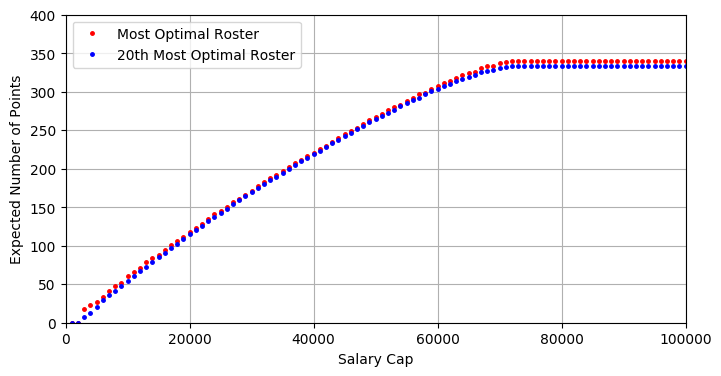

PyObject <matplotlib.legend.Legend object at 0x147501590>

In [160]:
numPerSalary = 20
salaryIncrements = 100
using JuMP, Gurobi,PyPlot, Mosek
result = zeros(salaryIncrements) #Most optimal roster
result2 = zeros(salaryIncrements) #20th (numPerSalary) most optimal roster
cap = collect(1000:1000:100000) 

for z in 3:salaryIncrements
    optimalRoster = 1000
    playerList = readcsv("DKsalaries.csv")
    numPlayers = trunc(Int,(length(playerList)/9))
    
    for number in 1:numPerSalary
    m = Model(solver=MosekSolver(LOG=0))
    @variable(m, players[2:numPlayers], Bin)
    @variable(m, pg[2:numPlayers], Bin)
    @variable(m, sg[2:numPlayers], Bin)
    @variable(m, sf[2:numPlayers], Bin)
    @variable(m, pf[2:numPlayers], Bin)
    @variable(m, c[2:numPlayers], Bin)
    @variable(m, f[2:numPlayers], Bin)
    @variable(m, g[2:numPlayers], Bin)
    @variable(m, util[2:numPlayers], Bin)
    @constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)
        for i in 2:numPlayers
            if contains(playerList[i,5],"PG")
                @constraint(m,pg[i] <= 1)
            else
                @constraint(m,pg[i] == 0)
            end
            if contains(playerList[i,5],"SG")
                @constraint(m,sg[i] <= 1)
            else
               @constraint(m,sg[i] == 0)
            end
            if contains(playerList[i,5],"SF")
                @constraint(m,sf[i] <= 1)
            else
                @constraint(m,sf[i] == 0)
            end
            if contains(playerList[i,5],"PF")
                @constraint(m,pf[i] <= 1)
            else
                @constraint(m,pf[i] == 0)
            end
             if contains(playerList[i,5],"C")
                @constraint(m,c[i] <= 1)
            else
                @constraint(m,c[i] == 0)
            end       
            if contains(playerList[i,5],"G")
                @constraint(m,g[i] <= 1)
            else
                @constraint(m,g[i] == 0)
            end
            if contains(playerList[i,5],"F")
                @constraint(m,f[i] <= 1)
            else
                @constraint(m,f[i] == 0)
            end
            if contains(playerList[i,5],"UTIL")
                @constraint(m,util[i] <= 1)
            else
                @constraint(m,util[i] == 0)
            end
        end  
        @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= cap[z])
        for i in 2:numPlayers
                @constraint(m, pg[i] + sg[i] + sf[i]+g[i] + pf[i] + c[i] + f[i] + util[i] - players[i] == 0)
        end
        @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
        
        @constraint(m,sum(players[i] * playerList[i,9] for i in 2:92) <= optimalRoster -.001)

        @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:92))
            solve(m);
        val = getobjectivevalue(m)
        if number == 1
            result[z]= val
        end
        if number == numPerSalary
            result2[z] = val
        end
        optimalRoster = val
end

end
  

figure(figsize=(8,4))
plot(cap,result,"r.", markersize=5)
plot(cap,result2,"b.", markersize=5)
#plot( xfine, yfine, "b-")
axis([0,100000,0,400])
grid("on")
ylabel("Expected Number of Points")
xlabel("Salary Cap")
legend(["Most Optimal Roster", "20th Most Optimal Roster"])

From the plot above we can see that the roster values plateau at around \$70,000. Beyond that it is difficult to get much information from the plot so the following is a plot of the difference between the most optimal and the 20th most optimal roster at each price point.

In [161]:
difference = zeros(100)
for i in 3:100
    difference[i] = result[i]-result2[i]
end

figure(figsize=(8,4))
plot(cap,difference,"g.", markersize=5)
plot(cap,cap,"r.")
axis([0,100000,0,10])
grid("on")
ylabel("Difference Between 1st and 20th Most Optimal Roster")
xlabel("Salary Cap")

PyObject <matplotlib.text.Text object at 0x145879490>

Since it is useless to have data after the plateau, or that amount to 0, from here on we will only use data points from salary caps in the range of \$3,000 to \$71,000.

In [162]:
points = difference[3:71]
y = points
x = collect(3000:1000:71000)
using PyPlot
figure(figsize=(8,4))
plot(x,y,"g.", markersize=5)
axis([0,80000,0,10])
grid("on")
ylabel("Difference Between 1st and 20th Most Optimal Roster")
xlabel("Salary Cap")

PyObject <matplotlib.text.Text object at 0x1447d2a10>

We wanted to have more concrete data, so we decided to create a least squares regression of the plot.

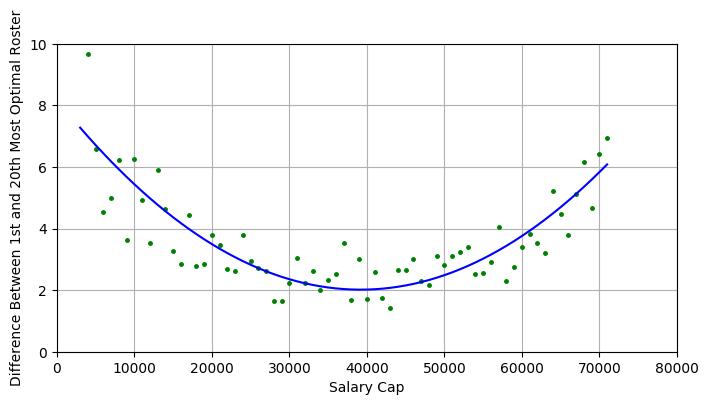

MOSEK warning 57: A large value of -8.8e+11 has been specified in cx for variable '' (0).


In [163]:
m = Model(solver=MosekSolver(LOG=0))


@variable(m, u[1:3])

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
    npts = length(x)
    differencex = x #linspace(0,10,npts)
    differencey = ones(npts)
#ffine = ones(npts)
for i in 1:npts
        differencey[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
    end

figure(figsize=(8,4))
plot( x, y, "g.", markersize=5)
plot( differencex, differencey, "b-")
axis([0,80000,0,10])
grid()
ylabel("Difference Between 1st and 20th Most Optimal Roster")
xlabel("Salary Cap")

From the graph we found that at \$40,000 there were the highest amount of rosters clustered around the most optimal roster. This would imply that \$40,000 is the best place to put the salary cap to ensure the game is competitive for the widest range of rosters. After running our code to find the most optimal salaries at this price point, we found that \$40,000 simply did not feature rosters that were both optimal and contained "Star" players. It wasn't until \$45,000 where a viable roster could be made with Anthony Davis, the most expensive and player, with the highest number of expected points as well as a very high points per dollar ratio. This implies at \$40,000, players could not make competive rosters while selecting some of the more expensive players. Expensive players are generally the better and more popular players. If a user must sacrifice their favorite players in order to be competive then this is going to make them less excited to play. By placing the salary cap at \$50,000, DraftKings is still keeping the relatively low difference in expected score of optimal rosters while allowing users to still select some of their favorite players.

After exploring that concept, we were curious about the graph of most optimal rosters at different salary caps.

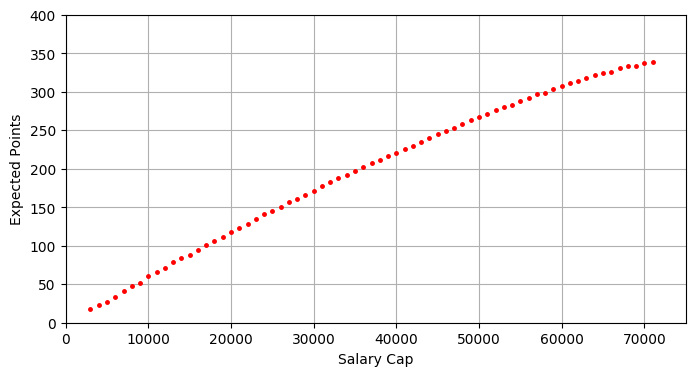

PyObject <matplotlib.text.Text object at 0x145366d50>

In [164]:
points = result[3:71]
y = points
x = collect(3000:1000:71000)
using PyPlot
figure(figsize=(8,4))
plot(x,y,"r.", markersize=5)
axis([0,75000,0,400])
grid("on")
ylabel("Expected Points")
xlabel("Salary Cap")

We were originally thinking that this graph was going to be linear, but after a closer look, it appeared a quadradic would be a closer fit. In order to test this, we found least squares regressions. One in the form: $ ax^2 + bx + c$ and another in the form: $ ax + b $

MOSEK warning 57: A large value of -6.7e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).


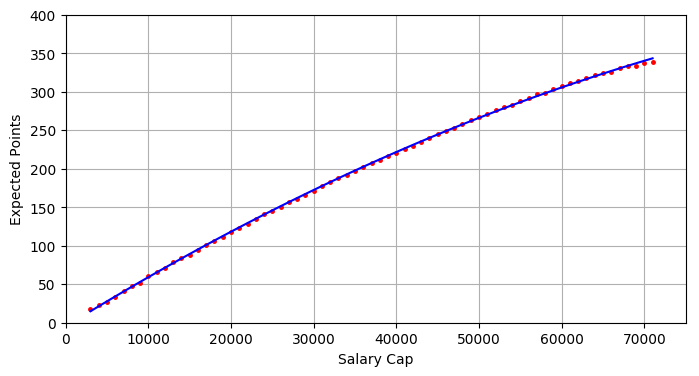

124.33504934795201
[-2.44474e-8, 0.00663999, -4.81459]


In [165]:
m = Model(solver=MosekSolver(LOG=0))

@variable(m, u[1:3])

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
npts = length(x)
newx = x 
newy = ones(npts)

for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
ylabel("Expected Points")
xlabel("Salary Cap")
println(getobjectivevalue(m))
println(getvalue(u))

MOSEK warning 57: A large value of -6.7e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).
5312.

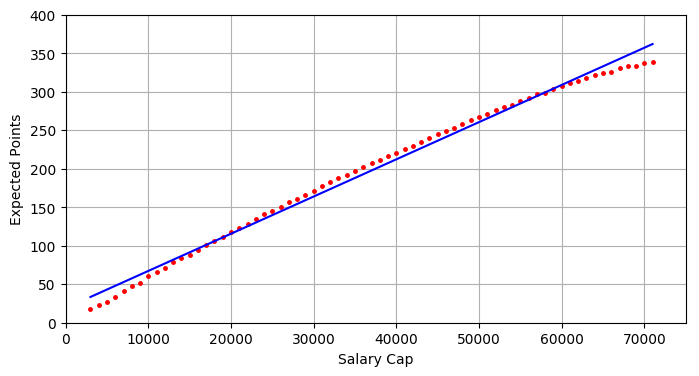

In [166]:
m = Model(solver=MosekSolver(LOG=0))


@variable(m, u[1:3])
@constraint(m, u[1] == 0)

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
npts = length(x)
newx = x #linspace(0,10,npts)
newy = ones(npts)
for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
ylabel("Expected Points")
xlabel("Salary Cap")
println(getobjectivevalue(m))

println(getvalue(u))

As you can see, the sum of the least squares for the line was 5312 but the least squares for the quadradic was only 124. This was even with the term on the $x^2$ being only -2.44474e-8. This left us perplexed and wondering why the graph was such a slow curve. We concluded it could be an intentional decison by DraftKings in the way their algorithm for assigning player costs work. 

Then, we realized this curve looks very similar to the graph of the difference between the most optimal and the 20th most optimal roster. We get the following graph by plotting the optimal roster plus the square of the difference between the most optimal and the 20th most optimal roster.

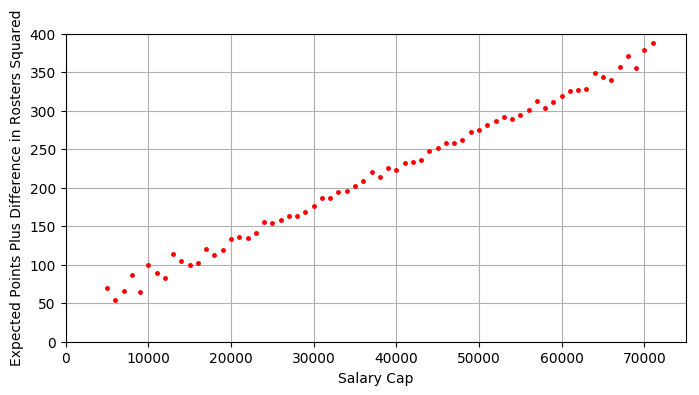

PyObject <matplotlib.text.Text object at 0x145887850>

In [167]:
points = result[5:71] + difference[5:71].^2

y = points
x = collect(5000:1000:71000)

using PyPlot
figure(figsize=(8,4))
plot(x,y,"r.", markersize=5)
axis([0,75000,0,400])
grid("on")
ylabel("Expected Points Plus Difference in Rosters Squared")
xlabel("Salary Cap")

We started this grapht at \$5,000 dollars. Below this value, the data was a bit sporadic due to very few players costing less than \$5,000. This graph appears much more linear. To check, we decide to find the least squares regressions again. Using these data points, we got the following.  


MOSEK warning 57: A large value of -7.1e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).


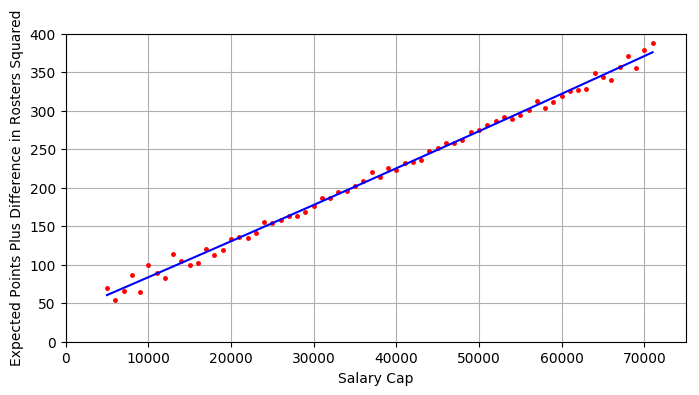

2758.9577332017943
[2.32286e-9, 0.00460125, 37.5121]


In [168]:
m = Model(solver=MosekSolver(LOG=0))

@variable(m, u[1:3])

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
npts = length(x)
newx = x 
newy = ones(npts)

for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
ylabel("Expected Points Plus Difference in Rosters Squared")
xlabel("Salary Cap")
println(getobjectivevalue(m))

println(getvalue(u))

MOSEK warning 57: A large value of -7.1e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).


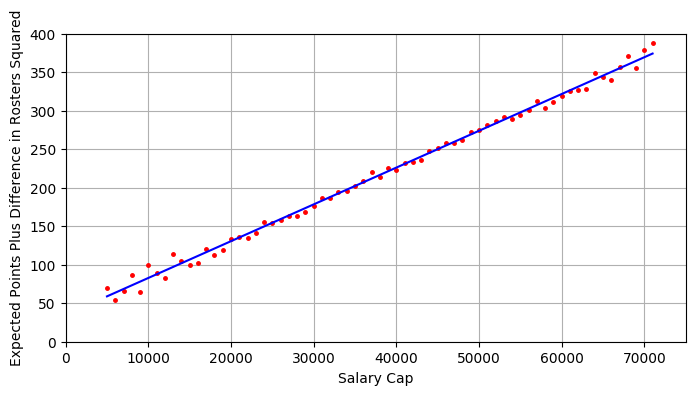

2799.3838401287794
[-0.0, 0.00477779, 35.0266]


In [169]:
m = Model(solver=MosekSolver(LOG=0))


@variable(m, u[1:3])
@constraint(m, u[1] == 0)

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
    npts = length(x)
newx = x #linspace(0,10,npts)
newy = ones(npts)
for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
ylabel("Expected Points Plus Difference in Rosters Squared")
xlabel("Salary Cap")
println(getobjectivevalue(m))

println(getvalue(u))


Looking at these two graphs there is almost no difference. Originally we had assumed that this was because at around \$40,000 we had the most optimal rosters in terms of points per dollar spent. We had hypothesized that the reason the graph of most optimal rosters at various salaries was not linear was due to the diminishing returns on the points per dollar spent after \$40,000. To test this we plotted the point return per dollar spent at each salary below.

In [170]:
testy2 = result[5:71]
testy = copy(testy2)

for i in 1:length(x)
    testy[i] = (testy2[i]/x[i])
    
end

figure(figsize=(8,4))
plot( x, testy, "r.", markersize=5)
axis([0,75000,0,.008])
grid()
ylabel("Points Per Dollar Spent")
xlabel("Salary Cap")

PyObject <matplotlib.text.Text object at 0x141519c90>

As the graph shows. Our hypothesis was incorrect. The data shows a steady decline after \$20,000, the salary point that the user is able to first draft a full team of 8 players. This gave us the realization that when this model is solving for the most optimal rosters it generally attempts to find a roster that gets as close to the salary cap as possible instead of trying to just find players that have a good point to dollar cost ratio. This explains why the graph of the difference between the most optimal and 20th most optimal roster is decreasing as it approaches \$40,000. As the salary amount goes up we have access to more players to purchase and with more players at the disposal of the user it makes sense that the spread beween one optimal roster and the next most optimal roster decreases. In trying to understand why this trend does not continue past \$40,000 we decided to look at the number of players available at each price point.

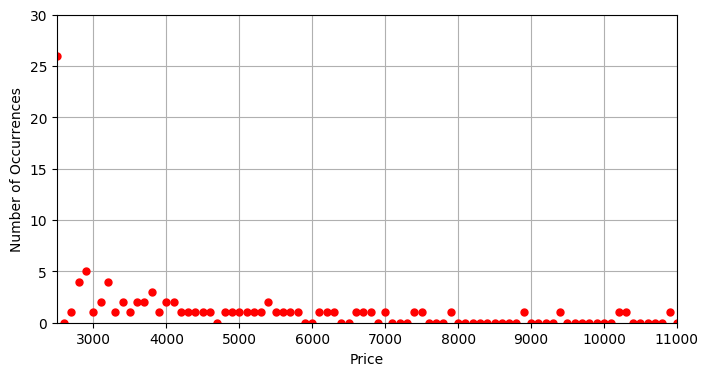

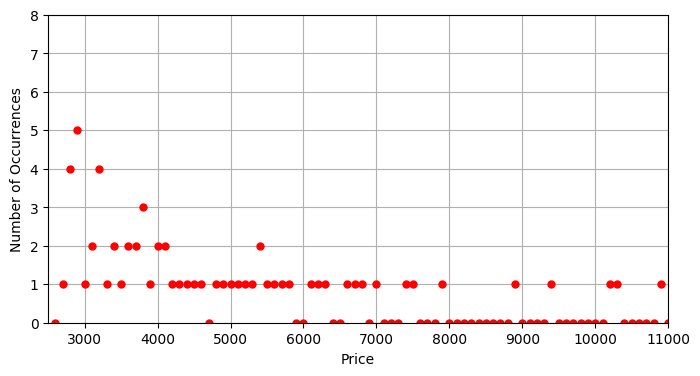

Number of values below or equal to 4500: 67


PyObject <matplotlib.text.Text object at 0x142bf9d50>

In [171]:
playerList2 = readcsv("DKsalaries.csv") # csv file name
numPlayers2 = trunc(Int,(length(playerList2)/9)) # getting the number of players listed in the csv

costList = collect(2500:100:11000)
occurenceList = zeros(length(costList))

for i in 1:length(costList)
    for j in 2:numPlayers2
        if costList[i] == playerList2[j,6]
            occurenceList[i] = occurenceList[i] + 1

        end
    end
end
counter = 0 
for j in 2:numPlayers2
        if playerList2[j,6] <= 5000
        counter = counter + 1

        end
    end

println("Number of values below or equal to 4500: ", counter)

figure(figsize=(8,4))
plot( costList, occurenceList, "r.", markersize=10)
axis([2500,11000,0,30])
grid()
ylabel("Number of Occurrences")
xlabel("Price")

figure(figsize=(8,4))
plot( costList, occurenceList, "r.", markersize=10)
axis([2500,11000,0,8])
grid()
ylabel("Number of Occurrences")
xlabel("Price")


We had to graph this one twice to get a good view of the data. The first graph includes the most common value of \$2500 and the second excludes that point so that we can take a closer look at the data. 67 of the 91 available players, nearly 75\%, are available at less than or equal to \$5000. This means that over 75\% of the players are available at the salary cap of \$40,000 when really that is only about half of the way through the salary range that give interesting results (\$20,000 is where the user can draft a full team and \$70,000 is when the perfect roster is found). After \$40,000 the amount of new players available to reasonably include on your team is much less than lower salary caps. From this it is logical to assume that the difference between the most optimal and the twentieth most optimal roster is larger than at lower salaries because there are fewer new players that are available at the higher costs to fill up your roster.

We see that the graphs look the way they do because below \$5,000 the density of players available is quite high and as the pool of players increases the spread of optimal rosters gets closer. Then after \$5000 the density of players available drops. Since the model generally selects to spend as much money as possible this results in fewer unique rosters that are able to spend that amount of money. Thus, causing an increase in the spread between more optimal and lesser optimal rosters.

## 5. Conclusion

This report has implements two models to analyze the optimization of a fantasy basketball roster on the website DraftKings. The first model gives us the most optimal roster for a given data set, and the second model expands on that to find the first N optimal rosters. We chose this second model because often on DraftKings one user is given the opportunity to submit multiple rosters for a given competition. In the results and discussion, we then look at the given salary cap and player cost to better understand the reasoning behind the choice at these seemingly arbitrary values.

Moving forward, these models could be further expanded to handle more sports such as baseball and football. The models could also be made to handle more variables. The two that we came up with were a players variance in expected points as well as the oponent's results against players in the same position. DraftKings, in addition to the player's expected points, also provides the average number of points that the player's opponent gives up. Taking into account these other variables could provide our models with more accurate results.